## Problem Statement : 
'__When should passengers purchase their airline ticket to get the cheapest price when flying from Delhi__'

> Dataset is extracted from https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction


### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Importing the dataset

Dataset on Flight Price : `Flight_Price.csv`     

In [2]:
#To remove warning messages
import warnings
warnings.filterwarnings('ignore')

flightData = pd.read_csv('Flight_Price.csv')
flightData.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


---

## Data Cleaning : Checking the dataset Dtype and Null rows
 

In [3]:
flightData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Let's list down all our observations from the super-quick glance of the dataset, as above.
* There are `11` variables/features/columns and `300153` observations/samples/rows in the dataset.
> The first variables/features/columns is the id of the rows, hence will not be taking into consideration into this observation

* There are `2` variables identified as `int64` by default, and it seems they are indeed Numeric.
> 1) days_left <br>
> 2) price <br>

* There is `1` variable identified as `float64` by default, and it is also Numeric
> 1) duration <br>
* There are `8` variables identified as `object` by default, and they are most likely Categorical.   
> 1) airline <br>
> 2) flight <br>
> 3) source_city <br>
> 4) departure_time <br>
> 5) stops <br> 
> 6) arrival_time <br> 
> 7) destination_city <br>
> 8) class <br>
* None of the variables/features seem to have any missing value




---

## Data Cleaning : Convert duration with dType of float64 into int64 to easier analysis and drop away the original duration column

In [4]:
#Duplicate duration column into roundDuration column
flightData['roundDuration'] = flightData['duration']
#round all values down
flightData['roundDuration'] = flightData['roundDuration'].apply(np.floor)
#convert dtype into int
flightData['roundDuration'] = flightData['roundDuration'].astype('Int64')
#drop column duration(since there is decimal which is useless to us)
flightData.drop(['duration'],inplace = True,axis=1)

In [5]:
flightData.isnull().head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,roundDuration
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
flightData.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
days_left           0
price               0
roundDuration       0
dtype: int64

Observation : No cells have any null value

---
## Data Cleaning : drop ['unnamed : 0'] Column 

In [7]:
flightData.drop(['Unnamed: 0'],inplace = True,axis=1)

In [8]:
flightData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   flight            300153 non-null  object
 2   source_city       300153 non-null  object
 3   departure_time    300153 non-null  object
 4   stops             300153 non-null  object
 5   arrival_time      300153 non-null  object
 6   destination_city  300153 non-null  object
 7   class             300153 non-null  object
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
 10  roundDuration     300153 non-null  Int64 
dtypes: Int64(1), int64(2), object(8)
memory usage: 25.5+ MB


---
## Data Cleaning : drop business class column as we are focusing on the cheapest price, hence only economy class is required

In [9]:
#Finding how many different class and the counts 
flightData['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [10]:
#Since we are intending to measure the cheapest flight ticket
#drop all business class row
business_class = flightData[flightData['class'] == 'Business']
flightData.drop(business_class.index, inplace = True ,axis=0)

---
## Data Cleaning :There are `6` source city and `6` destination in the dataset.
## Hence we will be narrowing down the source city to `Delhi` as it is the `Capital of India`

In [11]:
#finding out what are the possible path using source
flightData['source_city'].value_counts()

Delhi        43027
Mumbai       41038
Bangalore    35620
Kolkata      32874
Hyderabad    27936
Chennai      26171
Name: source_city, dtype: int64

In [12]:
#finding out what are the possible path using destination
flightData['destination_city'].value_counts()

Delhi        40653
Mumbai       40106
Bangalore    34870
Kolkata      34776
Hyderabad    29051
Chennai      27210
Name: destination_city, dtype: int64

In [13]:
flightDataDelhi = flightData[flightData['source_city'] == 'Delhi']

---
## Data Cleaning : Drop ['class'] and ['flight'] airline as all the flight class is economy and remove flight due to the large amount of different airline flight number

In [14]:
flightDataDelhi.drop(['flight'],inplace = True,axis=1)

In [15]:
flightDataDelhi.drop(['class'],inplace = True,axis=1)

In [16]:
#print out info to verify changes
flightDataDelhi.head(n=30)

,airline,source_city,departure_time,stops,arrival_time,destination_city,days_left,price,roundDuration
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,1,5953,2
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,1,5953,2
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,1,5956,2
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,1,5955,2
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,1,5955,2
5,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,1,5955,2
6,Vistara,Delhi,Morning,zero,Morning,Mumbai,1,6060,2
7,Vistara,Delhi,Afternoon,zero,Evening,Mumbai,1,6060,2
8,GO_FIRST,Delhi,Early_Morning,zero,Morning,Mumbai,1,5954,2
9,GO_FIRST,Delhi,Afternoon,zero,Evening,Mumbai,1,5954,2


---
## EDA : Compare price with different columns

In [17]:
# Find out how many different airlines are there 

#Finding how many different airlines and the counts 
flightDataDelhi['airline'].value_counts()

Vistara      12254
Air_India     9861
Indigo        8277
GO_FIRST      5724
AirAsia       4387
SpiceJet      2524
Name: airline, dtype: int64

Total of 6 Airlines are involved in the dataset 

In [18]:
#Finding how many different time period and the counts 
flightDataDelhi['departure_time'].value_counts()

Evening          11309
Morning           9512
Early_Morning     9117
Afternoon         8058
Night             4674
Late_Night         357
Name: departure_time, dtype: int64

Total of 6 different time period are involved in the dataset 

In [19]:
#Finding how many different number of stops 
flightDataDelhi['stops'].value_counts()

one            33283
zero            7253
two_or_more     2491
Name: stops, dtype: int64

### Plotting Price vs Airline using CatPlot

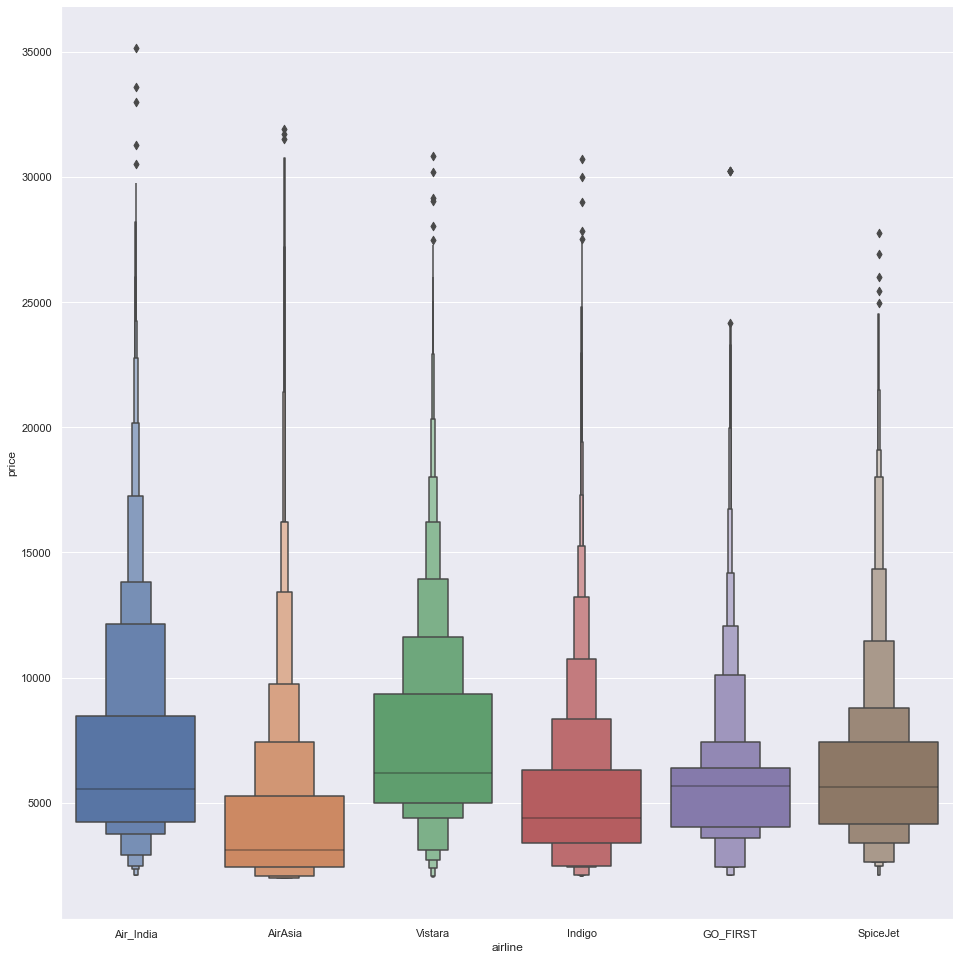

In [20]:
sb.catplot(y = "price", x = "airline", data = flightDataDelhi.sort_values("price", ascending = False), kind="boxen", height = 13.5, aspect = 1)
plt.show()

<b>Intepretation</b>: With the aid of catplot, we plot the boxplot with price against the airline and we can infer that Air India has the most outliers while GO_FIRST has the least in terms of price. From the boxplot, we can also deduce that the median prices for the most of the airlines are approximately at the 5000 mark.


### Plotting Lineplot for Departure Time vs Price

Text(0.5, 0, 'Time of day')

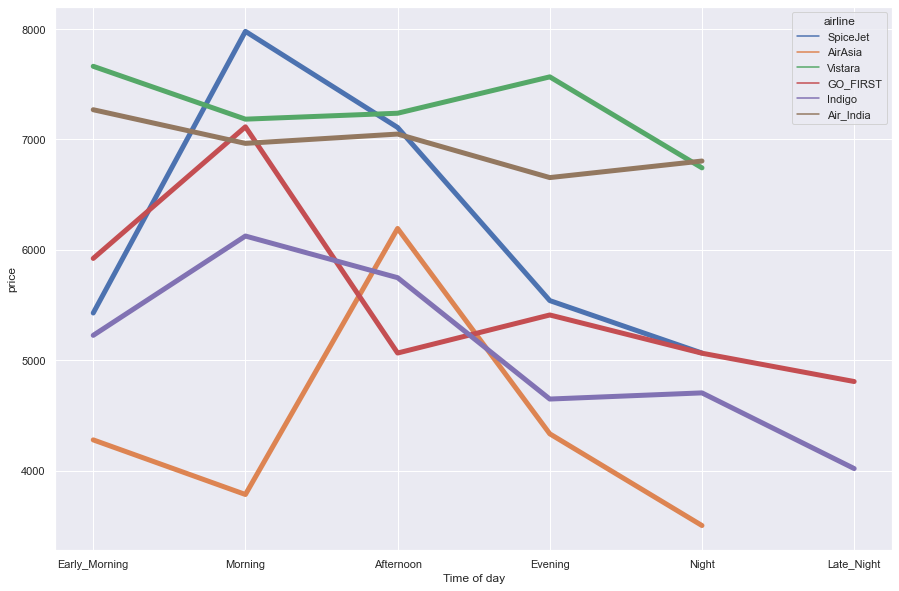

In [21]:
#compare time of day to price 
plt.figure(figsize=(15,10))
#sort journey eco in time of day
sort_flightDataDelhi = pd.Categorical(flightDataDelhi['departure_time'], categories = ["Early_Morning", "Morning","Afternoon", "Evening","Night","Late_Night"], ordered=True )
#plotting of lineplot using departure time to price 
#ci= none states for confidence interval set to none
#reason for ci=none is i just wanted to the average pricing throughout the different airline and time of day 
sb.lineplot(data=flightDataDelhi, hue ="airline", y="price",  x = sort_flightDataDelhi, ci= None, linewidth=5)
plt.xlabel("Time of day")

<b>Intepretation</b>: 

Comparatively, 50% of the airlines i.e. SpiceJet, GO_FIRST and Indigo, have a spike in price between the EarlyMorning and Morning period while the rest of the airlines have drop in prices.

Additionally, we can also see a drastic spike in prices between the Morning and Afternoon period for AirAsia while the flight prices for the rest of the airlines have a gradual drop 

Comparing the flight prices during the evening period, most of the airlines dip in prices except for Air_India. This aligns with our general understanding of how flight prices work and it shows that flight prices during the evening period is cheaper compared to the flight prices during rest of the day.


### Plotting Lineplot for Days_Left vs Price

<AxesSubplot:xlabel='days_left', ylabel='price'>

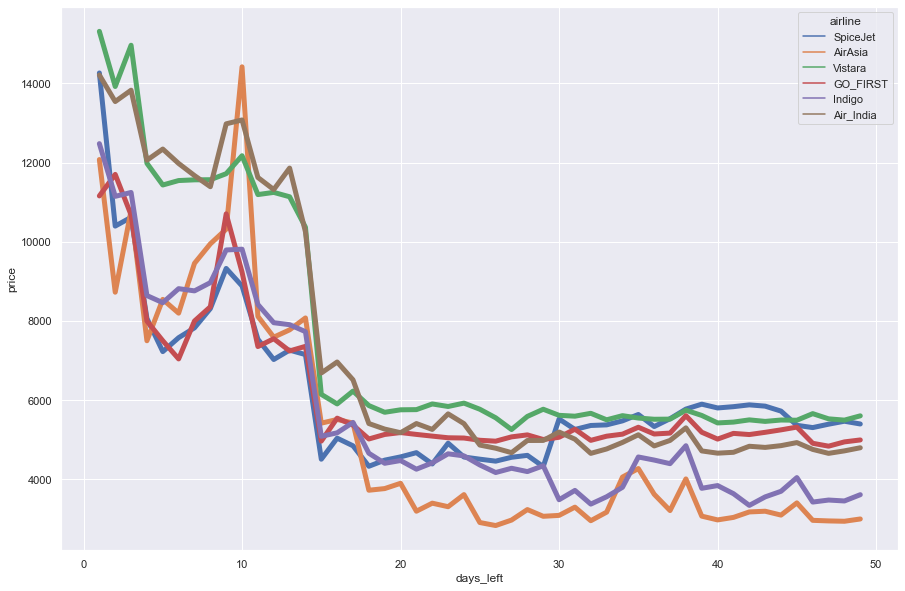

In [22]:
#checking if any other variable is affecting the price  
#check if days left to purchase affect the price
 
#compare days left to price
plt.figure(figsize=(15,10))
sb.lineplot(data=flightDataDelhi, hue ="airline", y="price",  x = "days_left", ci= None, linewidth=5)



<b>Intepretation</b>: From the line graph above, we can deduce that the price is on the lowest range when the days_left is from 20 to 50. However, we do notice a spike in price when the days_left is between approx 8 days to 10 days.

Lastly, we also notice that there are 2 dips in prices when the days_left is approximately on the 4th and between 14th-16th day 

### Plotting Lineplot for Stops vs Price

Text(0.5, 0, 'Number of stops')

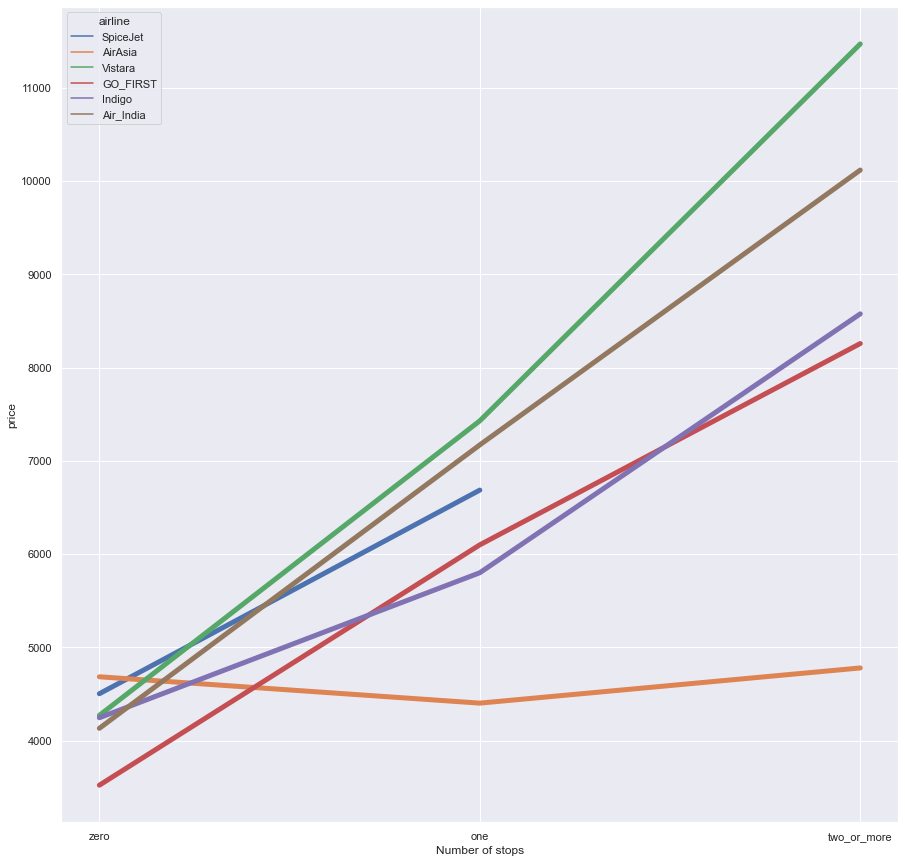

In [23]:
#checking if any other variable is affecting the price
#check if no of stops affect the price
 
#compare time of day to price 
plt.figure(figsize=(15,15))
#sort stops to display in ascending order 
sort_flightDataStop = pd.Categorical(flightDataDelhi['stops'], categories = ["zero", "one","two_or_more"], ordered=True )
sb.lineplot(data=flightDataDelhi, hue ="airline", y="price",  x = sort_flightDataStop, ci = None , linewidth=5)
plt.xlabel("Number of stops")


<b>Intepretation</b>: From the line graph above, we can conclude that there is a positive linear relationship between number of stops to price. 

However, based on normal understanding of how stops and price works, it should be a negative linear relationship, hence further analysis is required to breakdown this. 

Additionally, it could be due to the prolonged hour of flying duration, hence the spike for two_or_more column to be more expensive 

# Machine Learning 

In [24]:
#show the info of the current data set 
flightDataDelhi.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,days_left,price,roundDuration
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,1,5953,2
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,1,5953,2
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,1,5956,2
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,1,5955,2
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,1,5955,2


In [25]:
#drop redundacy column
flightDataDelhi.drop(['source_city'],inplace = True,axis=1)
flightDataDelhi.drop(['arrival_time'],inplace = True,axis=1)

In [26]:
#show the info of the current data set 
flightDataDelhi.head()

,airline,departure_time,stops,destination_city,days_left,price,roundDuration
0,SpiceJet,Evening,zero,Mumbai,1,5953,2
1,SpiceJet,Early_Morning,zero,Mumbai,1,5953,2
2,AirAsia,Early_Morning,zero,Mumbai,1,5956,2
3,Vistara,Morning,zero,Mumbai,1,5955,2
4,Vistara,Morning,zero,Mumbai,1,5955,2


## Fitting into DecisionTreeClassifier

In [32]:
!pip install -U scikit-learn

In [33]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical, only required for airline, departure_time, stops and destination city 
flightDataDelhi_cat = flightDataDelhi[['airline', 'stops', 'destination_city']]
ohe.fit(flightDataDelhi_cat)
#transform the category into columns 
flightDataDelhi_cat_ohe = pd.DataFrame(ohe.transform(flightDataDelhi_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(flightDataDelhi_cat.columns))

# print out the result 
flightDataDelhi_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43027 entries, 0 to 43026
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   airline_AirAsia             43027 non-null  float64
 1   airline_Air_India           43027 non-null  float64
 2   airline_GO_FIRST            43027 non-null  float64
 3   airline_Indigo              43027 non-null  float64
 4   airline_SpiceJet            43027 non-null  float64
 5   airline_Vistara             43027 non-null  float64
 6   stops_one                   43027 non-null  float64
 7   stops_two_or_more           43027 non-null  float64
 8   stops_zero                  43027 non-null  float64
 9   destination_city_Bangalore  43027 non-null  float64
 10  destination_city_Chennai    43027 non-null  float64
 11  destination_city_Hyderabad  43027 non-null  float64
 12  destination_city_Kolkata    43027 non-null  float64
 13  destination_city_Mumbai     430

In [34]:
# Combining Numeric features with the OHE Categorical features
flightDataDelhi_num = flightDataDelhi[['days_left','roundDuration','price']]
flightDataDelhi_res = flightDataDelhi['departure_time']
flightDataDelhi_ohe = pd.concat([flightDataDelhi_num, flightDataDelhi_cat_ohe, flightDataDelhi_res], 
                           sort = False, axis = 1).reindex(index=flightDataDelhi_num.index)

# Check the final dataframe
flightDataDelhi_ohe.head()

,days_left,roundDuration,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,stops_one,stops_two_or_more,stops_zero,destination_city_Bangalore,destination_city_Chennai,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,departure_time
0,1,2,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Evening
1,1,2,5953,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Early_Morning
2,1,2,5956,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Early_Morning
3,1,2,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Morning
4,1,2,5955,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Morning


[Text(0.5, 0.9166666666666666, 'roundDuration <= 11.5\ngini = 0.79\nsamples = 30118\nvalue = [5637, 6448, 7920, 250, 6638, 3225]\nclass = Evening'),
 Text(0.25, 0.75, 'roundDuration <= 6.5\ngini = 0.79\nsamples = 19015\nvalue = [4442, 4185, 3494, 226, 4751, 1917]\nclass = Morning'),
 Text(0.125, 0.5833333333333334, 'roundDuration <= 2.5\ngini = 0.786\nsamples = 10491\nvalue = [2238, 2309, 2878, 181, 2034, 851]\nclass = Evening'),
 Text(0.0625, 0.4166666666666667, 'airline_SpiceJet <= 0.5\ngini = 0.792\nsamples = 5021\nvalue = [651, 1141, 1450, 99, 893, 787]\nclass = Evening'),
 Text(0.03125, 0.25, 'airline_GO_FIRST <= 0.5\ngini = 0.798\nsamples = 4548\nvalue = [651, 941, 1249, 99, 886, 722]\nclass = Evening'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.794\nsamples = 3931\nvalue = [495, 779, 1089, 70, 854, 644]\nclass = Evening'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.779\nsamples = 617\nvalue = [156, 162, 160, 29, 32, 78]\nclass = Early Morning'),
 Text(0.09375, 0.25, 'de

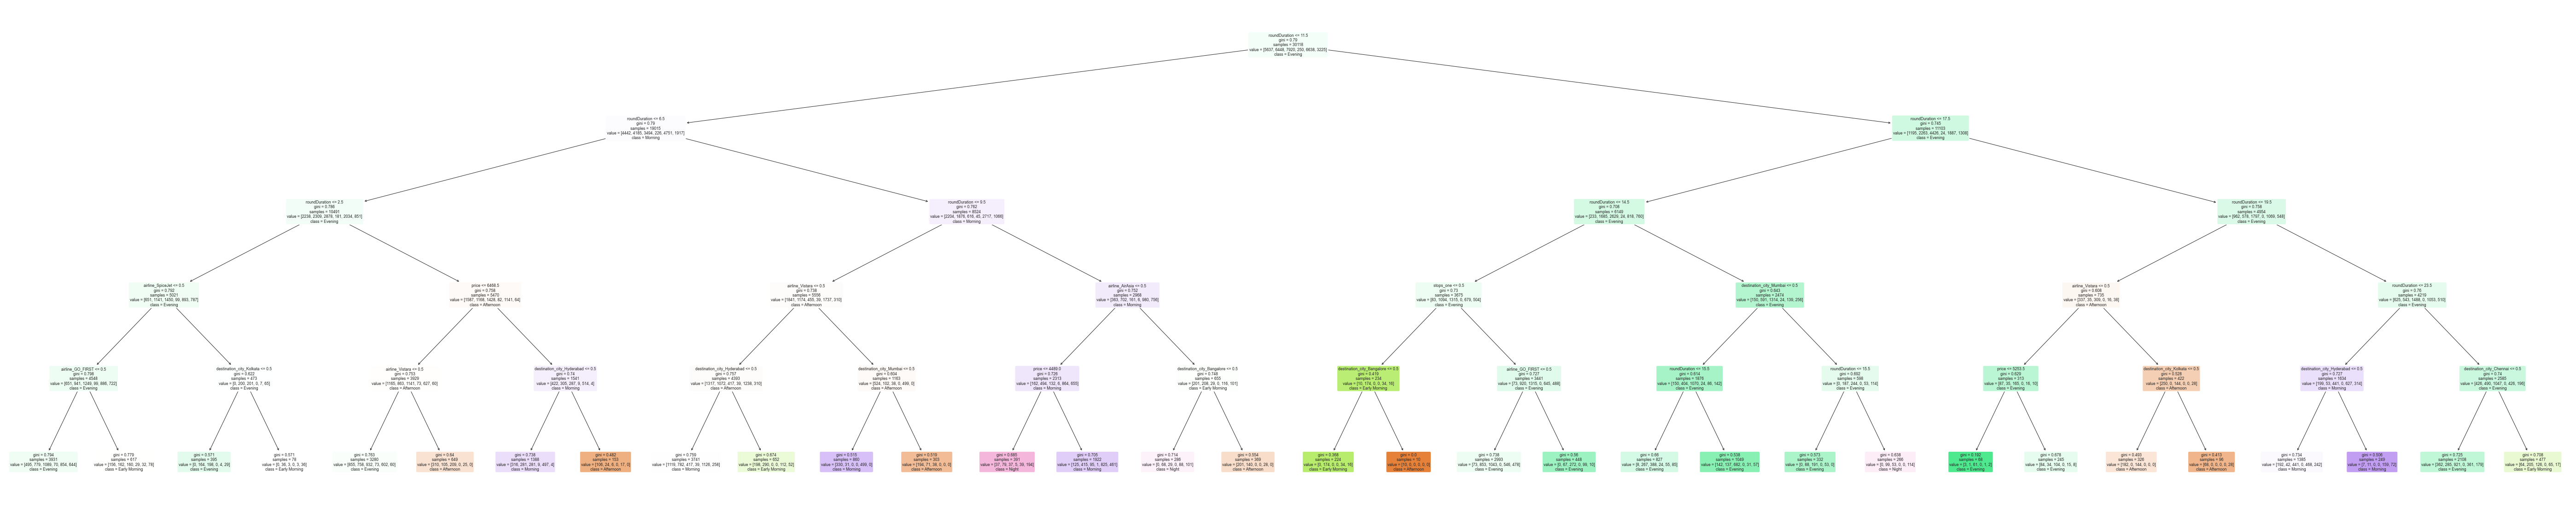

In [35]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(flightDataDelhi_ohe['departure_time'])
X = pd.DataFrame(flightDataDelhi_ohe.drop('departure_time', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=5)  # change max_depth to experiment
dectree = dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Treetelegra
f = plt.figure(figsize=(100,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Afternoon", "Early Morning","Evening","Late Night","Morning","Night"])

In [36]:
#Categorise the time of day for easier matrix calculation and demo
flightDataDelhi.loc[flightDataDelhi["departure_time"] == "Evening", "departure_time"] = "After 12pm"
flightDataDelhi.loc[flightDataDelhi["departure_time"] == "Late_Night", "departure_time"] = "After 12Mn"
flightDataDelhi.loc[flightDataDelhi["departure_time"] == "Afternoon", "departure_time"] = "After 12pm"
flightDataDelhi.loc[flightDataDelhi["departure_time"] == "Morning", "departure_time"] = "After 12Mn"
flightDataDelhi.loc[flightDataDelhi["departure_time"] == "Night", "departure_time"] = "After 12pm"
flightDataDelhi.loc[flightDataDelhi["departure_time"] == "Early_Morning", "departure_time"] = "After 12Mn"

Train Data
Accuracy  :	 0.6198286738827279

TPR Train :	 0.6589979246961162
TNR Train :	 0.5699841545310496

FPR Train :	 0.43001584546895044
FNR Train :	 0.34100207530388377


<AxesSubplot:>

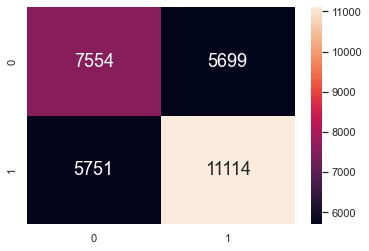

In [37]:
#show time of the day 
flightDataDelhi2_cat = flightDataDelhi[['airline', 'stops', 'destination_city']]
ohe.fit(flightDataDelhi2_cat)
#transform the category into columns 
flightDataDelhi2_cat_ohe = pd.DataFrame(ohe.transform(flightDataDelhi2_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(flightDataDelhi2_cat.columns))

# Combining Numeric features with the OHE Categorical features
flightDataDelhi2_num = flightDataDelhi[['days_left','roundDuration','price']]
flightDataDelhi2_res = flightDataDelhi['departure_time']
flightDataDelhi2_ohe = pd.concat([flightDataDelhi2_num, flightDataDelhi2_cat_ohe, flightDataDelhi2_res], 
                           sort = False, axis = 1).reindex(index=flightDataDelhi2_num.index)

# Check the final dataframe
flightDataDelhi2_ohe.head()


# Extract Response and Predictors
y = pd.DataFrame(flightDataDelhi2_ohe['departure_time'])
X = pd.DataFrame(flightDataDelhi2_ohe.drop('departure_time', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth=5)  # change max_depth to experiment
dectree = dectree.fit(X_train, y_train)      

# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6241381981563251

TPR Test :	 0.6623467112597548
TNR Test :	 0.5763125763125763

FPR Test :	 0.4236874236874237
FNR Test :	 0.33765328874024525


<AxesSubplot:>

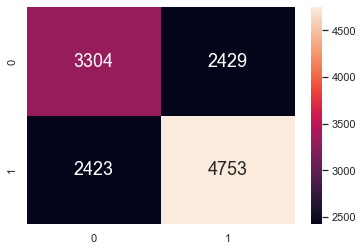

In [38]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

<b>Intepretation</b>: 
Decision tree is used to compare different predictors variables to a categorical response variable (time of day).
Based on the classification accuracy, it is approximately 60%.
Additionally, the false positive rate fall below 50% 

## Fitting into RandomForestClassifier

Train Data
Accuracy  :	 0.8657945414702172

TPR Train :	 0.9010562749895566
TNR Train :	 0.8215702417483721

FPR Train :	 0.17842975825162788
FNR Train :	 0.09894372501044339


<AxesSubplot:>

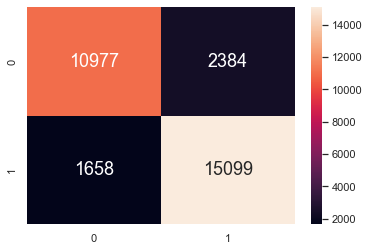

In [45]:
#show time of the day 
flightDataDelhi3_cat = flightDataDelhi[['airline', 'stops', 'destination_city']]
ohe.fit(flightDataDelhi2_cat)
#transform the category into columns 
flightDataDelhi3_cat_ohe = pd.DataFrame(ohe.transform(flightDataDelhi3_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(flightDataDelhi3_cat.columns))

# Combining Numeric features with the OHE Categorical features
flightDataDelhi3_num = flightDataDelhi[['days_left','roundDuration','price']]
flightDataDelhi3_res = flightDataDelhi['departure_time']
flightDataDelhi3_ohe = pd.concat([flightDataDelhi3_num, flightDataDelhi3_cat_ohe, flightDataDelhi3_res], 
                           sort = False, axis = 1).reindex(index=flightDataDelhi3_num.index)

# Check the final dataframe
flightDataDelhi3_ohe.head()


# Extract Response and Predictors
y = pd.DataFrame(flightDataDelhi3_ohe['departure_time'])
X = pd.DataFrame(flightDataDelhi3_ohe.drop('departure_time', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.departure_time.ravel())

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.7679913238825625

TPR Test :	 0.813563975837452
TNR Test :	 0.7089777777777778

FPR Test :	 0.29102222222222224
FNR Test :	 0.18643602416254806


<AxesSubplot:>

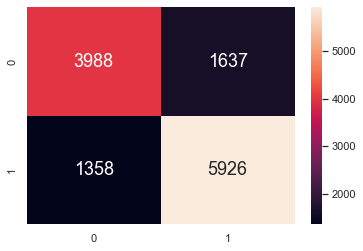

In [46]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

<b>Intepretation:</b>
To better improvise the accuracy and measures for the decision tree, random forest is used. 
As shown, the accuracy for the data set has improved significally to approx 70-80% and on top of it, the FPR has decreased to approximately below 30% 

As for the DecisionTree, we have optimized the accuracy by adjusting the max-depth to 5 to obtain an accuracy score of 65% for our train data. 

To better improve the accuracy and achieve a higher True Positive Rate, we used RandomForestClassifier. We made further optimization by adjusting the n_estimators and max_depth to 100 and 15 respectively in order to achieve a better results. Hence, we managed to obtained the following results:
Accuracy = 86%
TPR = 90%
FPR = 15%

From the the DecisionTree and RandomForestClassifier models, we achieved a higher accuracy on the RandomForestClassifier at approximately 70 - 80% and a lower FPR below 30%. This gives us a better model to predict the flight prices near to the actual price for majority of the variables.




## Welcome to Airline ticket analysis repository 

### About 
This is a Mini Project for SC1015/CE1115/CZ1115/ INTRO TO DATA SCI & ART INTELLIGENCE which focuses on the price for Air Travel Industry in India. For the walkthrough, please kindly refer to the source code below 
 shortcut to the notebook file
    
### Contributors
Han Ye - Code <br>
Hakim – Code/Slides <br>
Siang Jan – Slides/Script <br>

### Problem Definition
<b>When should passengers purchase their airline ticket to get the cheapest price when flying in India?</b>

Model Used: 
<li>Decision Tree</li>
<li>Confusion Matrix</li>
<li>Random Forest</li>

### Conclusion
<b>For Exploratory Data Analysis</b>
<br>
Increased in outliers on Air India price ticket as compared to the other airline and overall the prices among different airlines are estimated at six thousand mark
There is a linear correlation between days left before departure to purchase air ticket vs price. Usually about 2 weeks in advance will be the most prefer period for the lowest price
There is a positive linear relation between number of stops vs price. However, based on our understanding, it should be a negative relation as the price should decrease with the number of increasing stops. 
For time of day vs price, it seems to have a common phase when the price spike, which is in the morning period and a gradual decrease during night time

<b>For Machine Learning</b>
<br>
As for the DecisionTree, we have optimized the accuracy by adjusting the max-depth to 5 to obtain an accuracy score of 65% for our train data.

To better improve the accuracy and achieve a higher True Positive Rate, we used RandomForestClassifier. We made further optimization by adjusting the n_estimators and max_depth to 100 and 15 respectively in order to achieve a better results. Hence, we managed to obtained the following results: Accuracy = 86% TPR = 90% FPR = 15%

From the the DecisionTree and RandomForestClassifier models, we achieved a higher accuracy on the RandomForestClassifier at approximately 70 - 80% and a lower FPR below 30%. This gives us a better model to predict the flight prices near to the actual price for majority of the variables.

### What did we learn from this project?
<li>Line Plot EDA</li>
<li>Usage on OneHotEncodern from sklearn.preprocessing for categorical variables</li>
<li>Handling and categorising datasets for easier computation and visualization</li>
<li>RandomForest from scikit-learn</li>

### Reference 
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction<br>
https://seaborn.pydata.org/generated/seaborn.lineplot.html<br>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html<br>
https://www.analyticsvidhya.com/blog/2022/01/flight-fare-prediction-using-machine-learning/<br>
https://medium.com/analytics-vidhya/regression-flight-price-prediction-6771fc4d1fb3<br>
